BPSK modulations

In [1]:
import matplotlib.pyplot as plt
#from mpl_toolkits import mplot3d
import numpy as np

In [2]:
def PSD_BOC(f, fs_ratio, fc_ratio, normalize=True):
    """
    Compute the Power Spectrum Density of the BOC(fs, fc) modulation.
    Inputs:
        - f : numpy.array(floats)
            Frequency range.
        - fs_ratio : Integer
            Frequency subcarrier ratio w.r.t 1.023 MHz
        - fc_ratio : Integer
            Frequency code ratio w.r.t 1.023 MHz
        - normalize : Boolean
            Should normalize the output or not.
    Outputs
        - G : numpy.array(floats)
    """
    n = 2 * fs_ratio / fc_ratio
    fs = fs_ratio * 1.023e6
    fc = fc_ratio * 1.023e6 

    if n % 2 != 0:
        # n is odd
        G = fc * ((np.tan(np.pi * f / (2*fs)) * np.cos(np.pi * f / fc)) \
            / (np.pi * f))**2
    else:
        # n is even
        G = fc * ((np.tan(np.pi * f / (2*fs)) * np.sin(np.pi * f / fc)) \
            / (np.pi * f))**2

    if normalize:
        G = G / np.max(G)

    return G

def PSD_PSK(f, fc_ratio, normalize=True):
    """
    Compute the Power Spectrum Density of the PSK-R(fc) modulation.
    Inputs:
        - f : numpy.array(floats)
            Frequency range.
        - fc_ratio : Integer
            Frequency code ratio w.r.t 1.023 MHz
        - normalize : Boolean
            Should normalize the output or not.
    Outputs
        - G : numpy.array(floats)
    """
    fc = fc_ratio * 1.023e6 

    G= (1/fc) * (np.sin(np.pi * f_range/fc) / (np.pi * f_range/fc))**2

    if normalize:
        G = G / np.max(G)

    return G

def PSD_altBOC(f, normalize=True):
    """
    Compute the Power Spectrum Density of the AltBOC(15,10) modulation.
    Inputs:
        - f : numpy.array(floats)
            Frequency range.
        - normalize : Boolean
            Should normalize the output or not.
    Outputs
        - G : numpy.array(floats)
    """

    fs = 15.345e6
    fc = 10.23e6

    Tc = 1 / fc
    Ts = 1 / fs 

    G = (4 * fc / (np.pi*f_range)**2) * (np.sin(np.pi*f_range/fc)**2/np.cos(np.pi*f_range/(2*fs))**2) \
      * (np.cos(np.pi*f_range/(2*fs))**2 - np.cos(np.pi*f_range/(2*fs)) - 2*np.cos(np.pi*f_range/(2*fs))*np.cos(np.pi*f_range/(4*fs)) + 2)  

    if normalize:
        G = G / np.max(G)

    return G

def plot_PSD(f, datasets, title, normalize=True):

    plt.figure(figsize=[10,6])

    max = 0.0
    for label, psd in datasets.items():
        plt.plot(f, psd, label=label)
        if max < np.max(psd):
            max = np.max(psd)
    
    if normalize:
        plt.ylabel("Normalized power")
    else:
        plt.yscale("log")
        plt.ylim([10e-11, max])
    
    plt.xlabel("Frequency offset to carrier [MHz]")
    plt.legend()
    plt.title(title)
    plt.tight_layout()
    plt.grid()
    plt.show()

    return

def plot_PSD_3D(f, datasets_I, datasets_Q=None):

    ax = plt.figure(figsize=[10,8]).add_subplot(projection='3d')

    for label, psd in datasets_I.items():
        ax.plot(f, psd, zs=0, zdir='y', label=label)
    
    for label, psd in datasets_Q.items():
        ax.plot(f, psd, zs=0, zdir='z', label=label)
    
    ax.set_zlabel("In-Phase normalized PSD")
    ax.set_ylabel("Quadra-Phase normalized PSD")
    ax.set_ylim([0, 1.0])
    ax.set_zlim([0, 100])
    
    ax.set_xlabel("Frequency offset to carrier [MHz]")
    ax.view_init(elev=20., azim=130)
    plt.legend()
    plt.title("Power Spectral Density")
    plt.show()

    return

# GPS
## L1

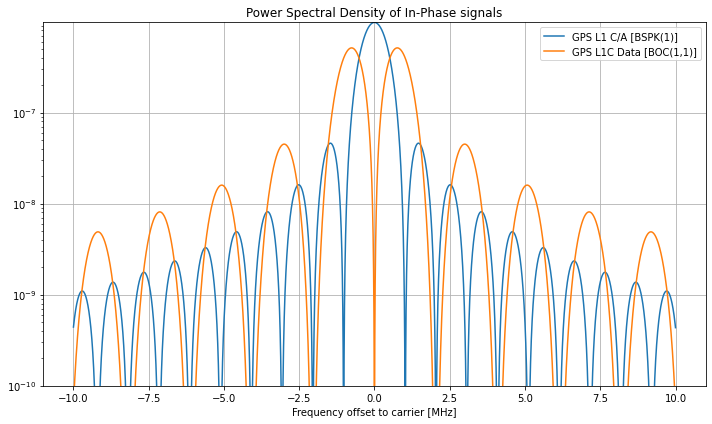

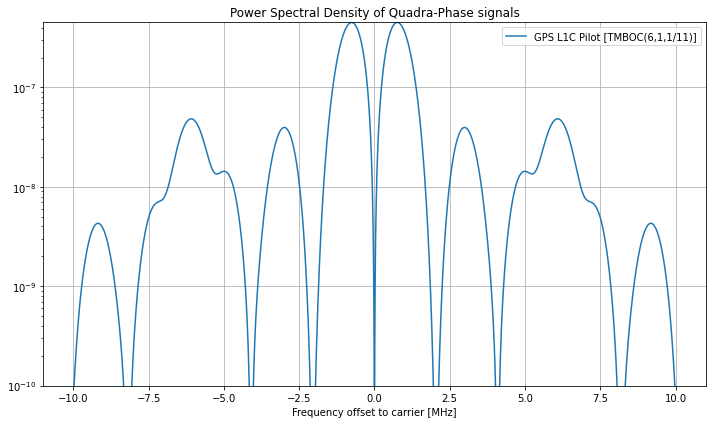

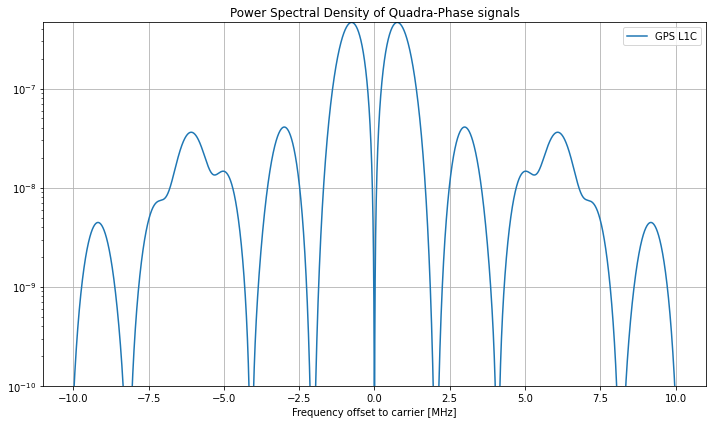

In [16]:
normalize = False
f = 1575.42  # Central frequency
df = 10e6     # Offset to frequency
f_range = np.arange(f - df, f + df, 1e3)
# C/A
psd_l1_ca = PSD_PSK(f_range, 1, normalize)
# GPS L1C
psd_l1c_data  = PSD_BOC(f_range, 1, 1, normalize)
psd_l1c_pilot = 29/33 * PSD_BOC(f_range, 1, 1, normalize) + 4/33 * PSD_BOC(f_range, 6, 1, normalize)
psd_l1c       = 1/4 * psd_l1c_data + 3/4 * psd_l1c_pilot

# Plots
signals = {
    "GPS L1 C/A [BSPK(1)]" : psd_l1_ca, 
    "GPS L1C Data [BOC(1,1)]" : psd_l1c_data
}
plot_PSD((f_range - f)/1e6, signals, "Power Spectral Density of In-Phase signals", normalize)

signals = {
    "GPS L1C Pilot [TMBOC(6,1,1/11)]" : psd_l1c_pilot
}
plot_PSD((f_range - f)/1e6, signals, "Power Spectral Density of Quadra-Phase signals", normalize)

signals = {
    "GPS L1C" : psd_l1c
}
plot_PSD((f_range - f)/1e6, signals, "Power Spectral Density of Quadra-Phase signals", normalize)

#plot_PSD_3D((f_range - f)/1e6, signals_I, signals_Q)

## L5

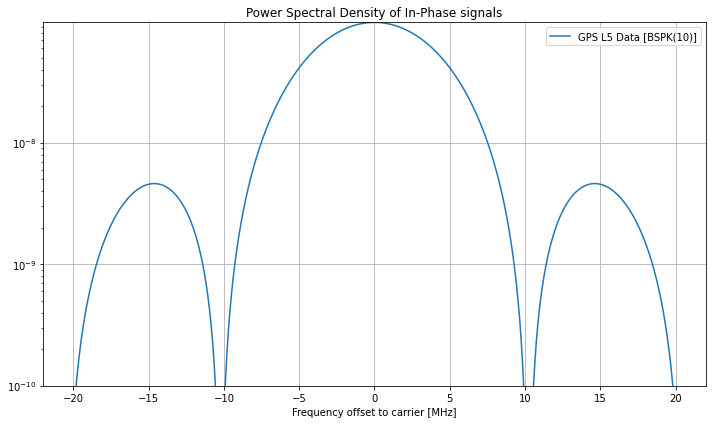

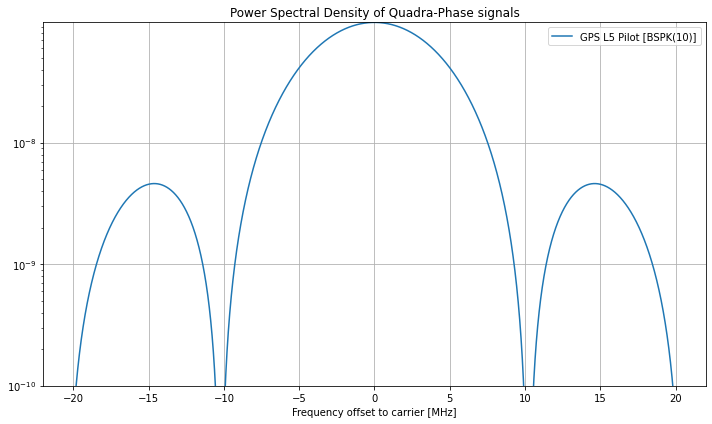

In [321]:
normalize = False
f = 1575.42 # Central frequency
df = 20e6     # Offset to frequency
f_range = np.arange(f - df, f + df, 1e3)
# L5
psd_l5_data  = PSD_PSK(f_range, 10, normalize)
psd_l5_pilot = PSD_PSK(f_range, 10, normalize)

# Plots
signals = {
    "GPS L5 Data [BSPK(10)]" : psd_l5_data, 
}
plot_PSD((f_range - f)/1e6, signals, "Power Spectral Density of In-Phase signals", normalize)

signals = {
    "GPS L5 Pilot [BSPK(10)]" : psd_l5_data
}
plot_PSD((f_range - f)/1e6, signals, "Power Spectral Density of Quadra-Phase signals", normalize)

# GALILEO
## E1

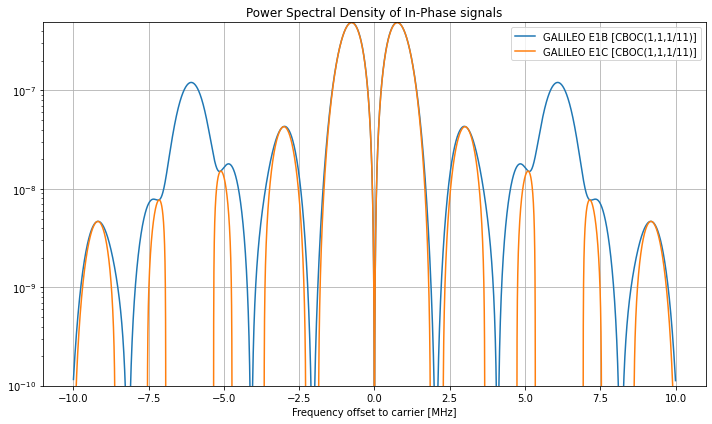

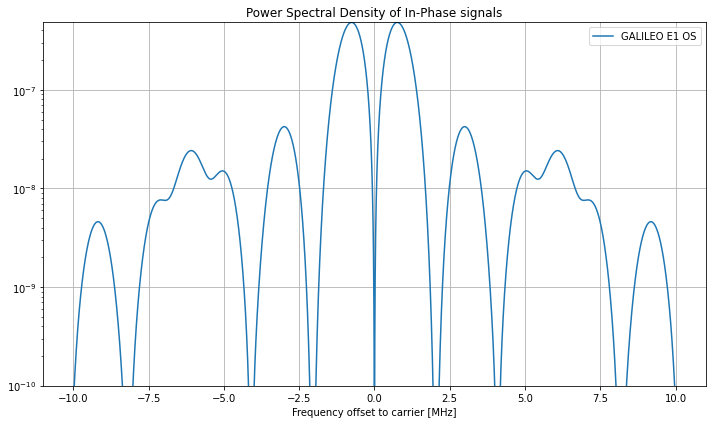

In [322]:
normalize = False
f = 1575.42  # Central frequency
df = 10e6     # Offset to frequency
f_range = np.arange(f - df, f + df, 1e3)
# E1B (Data)
psd_e1b_data  = np.sqrt(10/11) * PSD_BOC(f_range, 1, 1, normalize) + np.sqrt(1/11) * PSD_BOC(f_range, 6, 1, normalize)
psd_e1c_pilot = np.sqrt(10/11) * PSD_BOC(f_range, 1, 1, normalize) - np.sqrt(1/11) * PSD_BOC(f_range, 6, 1, normalize)
psd_e1        = 0.5 * psd_l1c_data + 0.5 * psd_l1c_pilot

# Plots
signals = {
    "GALILEO E1B [CBOC(1,1,1/11)]" : psd_e1b_data, 
    "GALILEO E1C [CBOC(1,1,1/11)]" : psd_e1c_pilot
}
plot_PSD((f_range - f)/1e6, signals, "Power Spectral Density of In-Phase signals", normalize)

# Plots
signals = {
    "GALILEO E1 OS" : psd_e1
}
plot_PSD((f_range - f)/1e6, signals, "Power Spectral Density of In-Phase signals", normalize)

## E5

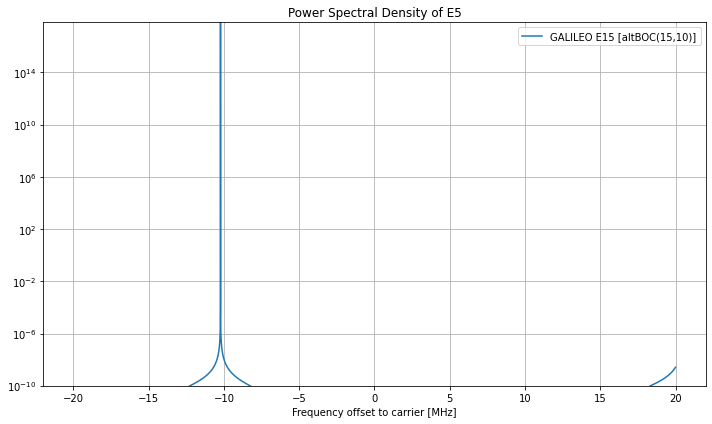

In [323]:
normalize = False
f = 1191.795e6  # Central frequency
df = 20e6     # Offset to frequency
f_range = np.arange(f - df, f + df, 1e3)
# E1B (Data)
psd_e5  = PSD_altBOC(f_range, normalize)

# Plots
signals = {
    "GALILEO E15 [altBOC(15,10)]" : psd_e5
}
plot_PSD((f_range - f)/1e6, signals, "Power Spectral Density of E5", normalize)